# Support Vector Machine

* Formulation

Support Vector Machine (SVM) is a supervised machine learning model that use classification  algorithm for finding decision boundary/hyperplane to separate two-group classification problem.

The hyperplane in sample space can be described using linear equation

\begin{equation}
\mathbf{w}^T \mathbf{x} + b = 0, \tag{1}
\end{equation}

here, $\mathbf{w} = (w_1, w_2, ..., w_d)$ is the normal vector of the hyperplane. Intercept $b$ denotes the distance between hyperplane and the origin point. The distance between random sample $\mathbf{x}$ and the hyperplane is

\begin{equation}
r = \frac{\left\vert \mathbf{w}^T \mathbf{x} + b \right\rvert}{\left\lVert \mathbf{w} \right\rVert} . \tag{2}
\end{equation}




* Large margin

If the hyperplane $(\mathbf{w}, b)$ is capable of properly classifying the samples. then for any samples in data space, we have 

\begin{equation}
   \begin{cases}
     w_i x_i + b \geq +1, & y_i = +1\\
     w_i x_i + b \leq -1, & y_i = -1
   \end{cases}       \tag{3}
\end{equation}

Samples that satisfy $\mathbf{w}^T \mathbf{x} + b = \pm 1$ are called support vectors. Note that only support vectors are important to form the SVM model(based on KKT condition, KKT is composed of Lagrangian multiplier condition, support vectors condition and constrains of Lagrangian function).

The distance between $\mathbf{w}^T \mathbf{x} + b = +1$ and $\mathbf{w}^T \mathbf{x} + b = -1$, namely $\displaystyle \gamma = \frac{2}{\left\lVert \mathbf{w} \right\rVert}$, are called margin.

To make sure the SVM is robust and is less likely to greatly affected by small local fluctuations, we need find the large margin / maximum margin, i.e.,

\begin{equation}
\underset{(\mathbf{w}, b)}{\max} \frac{2}{\left\lVert \mathbf{w} \right\rVert},\\
s.t. y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1, i = 1,2, ..., m. \tag{4}
\end{equation}

Here, we have $m$ samples in the data space.

This is equivalent to the following

\begin{equation}
\underset{(\mathbf{w}, b)}{\min} \frac{1}{2}\left\lVert \mathbf{w} \right\rVert^2,\\
s.t. y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1, i = 1,2, ..., m. \tag{5}
\end{equation}

This is the base form of SVM. Obviously, it is a Convex Quadratic Programming (CQP) problem.

* Dual problem

We need to find solutions of equatin (5) to obtain the hyperplane model $f(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + b$. We use Lagrangian Multiplier theorem to form the Lagrangian Function

\begin{equation}
L(\mathbf{w}, b, \mathbf{\alpha}) = \frac{1}{2}\left\lVert \mathbf{w} \right\rVert^2 - \sum\limits_{i=1}^m \alpha_i [y_i(\mathbf{w}^T \mathbf{x}_i + b) - 1] . \tag{6}
\end{equation}

Here, we assume $\mathbf{\alpha_i} \geq 0$. Set $\displaystyle \frac{\partial L(\mathbf{w}, b, \mathbf{\alpha})}{\partial \mathbf{w}} = 0$ and $\displaystyle \frac{\partial L(\mathbf{w}, b, \mathbf{\alpha})}{\partial b} = 0$. equation (6) is reorganized as 

\begin{equation}
\underset{\mathbf{\alpha}}{\max} \sum\limits_{i=1}^m \alpha_i - \frac{1}{2} \sum\limits_{i=1}^m \sum\limits_{j=1}^m \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j,\\
s.t. \sum\limits_{i=1}^{m} \alpha_i y_i = 0 \quad \text{and} \quad \alpha_i \geq 0, \quad i = 1,2, ..., m. \tag{7}
\end{equation}

Equation (7) is a dual problem of equation (5).

Once we found the multiplier $\alpha$, we can estimate $\mathbf{w}$ based on $\displaystyle \frac{\partial L(\mathbf{w}, b, \mathbf{\alpha})}{\partial \mathbf{w}} = 0$ and calculate $b$ based on large margin.

The model is then obtained

\begin{equation}
f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b = \sum\limits_{i=1}^{m} \alpha_i y_i \mathbf{x}_i^T \mathbf{x} + b. \tag{8}
\end{equation}

* Kernel trick

SVM allows one to classify data that's linearly separable. If it isn't, one can use kernel trick to make it works.

Kernel function mapping original space to a higer dimension so that it is more easy to find a hyperplane. The hyperplane is

\begin{equation}
f(\mathbf{x}) = \mathbf{w}^T \phi(\mathbf{x}) + b . \tag{9}
\end{equation}

Here $\phi(\mathbf{x})$ is the kernel function of feature vector.

Then the SVM problem becomes

\begin{equation}
\underset{(\mathbf{w}, b)}{\min} \frac{1}{2}\left\lVert \mathbf{w} \right\rVert^2,\\
s.t. y_i(\mathbf{w}^T \phi(\mathbf{x}_i) + b) \geq 1, i = 1,2, ..., m. \tag{10}
\end{equation}

The corresponding dual problem is

\begin{equation}
\underset{\mathbf{\alpha}}{\max} \sum\limits_{i=1}^m \alpha_i - \frac{1}{2} \sum\limits_{i=1}^m \sum\limits_{j=1}^m \alpha_i \alpha_j y_i y_j \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j),\\
s.t. \sum\limits_{i=1}^{m} \alpha_i y_i = 0 \quad \text{and} \quad \alpha_i \geq 0, \quad i = 1,2, ..., m. \tag{11}
\end{equation}

It is expensive to find the inner product $\phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)$ directly, we define kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$ to avoid high dimensional calculations

\begin{equation}
\underset{\mathbf{\alpha}}{\max} \sum\limits_{i=1}^m \alpha_i - \frac{1}{2} \sum\limits_{i=1}^m \sum\limits_{j=1}^m \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j),\\
s.t. \sum\limits_{i=1}^{m} \alpha_i y_i = 0 \quad \text{and} \quad \alpha_i \geq 0, \quad i = 1,2, ..., m. \tag{12}
\end{equation}

The model is then

\begin{equation}
f(\mathbf{x}) = \mathbf{w}^T \phi(\mathbf{x}) + b = \sum\limits_{i=1}^{m}\alpha_iy_iK(\mathbf{x}, \mathbf{x}_i) + b. \tag{13}
\end{equation}

* Soft margin

Different from the hard margin, the soft margin allows the existence of some samples that are not satisfied with the constraints $y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1$. The optimization purpose of soft margin is to find a large margin and there are fewer samples that are not satisfied with the constraints. Therefore, the constrains of the soft margin, $y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1-\zeta_i$, has a similar constrains but with a slack variable $\zeta_i \geq 0$ to represent overlap. Some samples are not satisfied with the constraints, so the loss function $l$ is supposed to consider in the optimization, this introduces the penalty constant $C$.

The objective of the optimization becomes

\begin{equation}
\underset{(\mathbf{w}, b)}{\min} \frac{1}{2}\left\lVert \mathbf{w} \right\rVert^2 + C \sum\limits_{i=1}^{m} l(y_i(\mathbf{w}^T \mathbf{x}_i + b) - 1),\\
s.t. y_i(\mathbf{w}^T \phi(\mathbf{x}_i) + b) \geq 1 - \zeta_i, i = 1,2, ..., m. \tag{14}
\end{equation}

The corresponding dual problem is

\begin{equation}
\underset{\mathbf{\alpha}}{\max} \sum\limits_{i=1}^m \alpha_i - \frac{1}{2} \sum\limits_{i=1}^m \sum\limits_{j=1}^m \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j),\\
s.t. \sum\limits_{i=1}^{m} \alpha_i y_i = 0 \quad \text{and} \quad 0 \leq \alpha_i \leq C, \quad i = 1,2, ..., m. \tag{15}
\end{equation}

* Tuning parameters 

1. Penalty C: how much you want to avoid misclassifying each training sample. Large C (may lead to overfitting) results to a smaller margin even if the model did a better classification job, and vise versa. C is a penalty to the optimization of the margin so that the system pays more attention to loss function. However, as for regularization constant $\lambda$, it is a penalty to the optimization of the loss function to avoid overfitting. ($\displaystyle C=\frac{1}{\lambda}$)

2. Margin $\gamma$: how far the influence of a single training reaches. If large $\gamma$ (small standard deviation $\sigma$) is used, only samples close to the margin are considered, and vise versa. (\displaystyle $\gamma = \frac{1}{2\sigma^2}$)


* Hand-on examples

In [ ]:
pip install cvxopt 

In [77]:
import numpy as np

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, c=1, degree=3):
    '''degree: great equal 1'''
    return (c + np.dot(x, y)) ** degree

def gaussian_kernel(x, y, sigma=2):
    '''sigma: great than 0'''
    gamma=1/2/(sigma ** 2)
    return np.exp(-np.linalg.norm(x-y)**2 *gamma)

def laplace_kernel(x, y, sigma):
    '''sigma: great than 0'''
    return np.exp(-np.linalg.norm(x-y) / sigma)

def sigmoid_kernel(beta, theta):
    '''beta: great than 0
       theta: less than 0'''
    return np.tanh(beta*np.dot(x, y) + theta)

In [106]:
import cvxopt
import cvxopt.solvers
import matplotlib.pyplot as plt
import math as m 

def train_test_split(X, Y, train_size, shuffle):
    ''' Perform tran/test datasets splitting '''
    if shuffle:
        randomize = np.arange(len(X))
        np.random.shuffle(randomize)
        X = X[randomize]
        Y = Y[randomize]
    s_id = int(len(Y) * train_size)
    X_train, X_test = X[:s_id], X[s_id:]
    Y_train, Y_test = Y[:s_id], Y[s_id:]
    return X_train, X_test, Y_train, Y_test 
    
    
def generate_dataset_MVND_ls():
    '''generate a dataset that satisfies the multivariate normal distribution
       and the dataset is linearly sperable'''
    np.random.seed(24) # Fixing random state for reproducibility
    num_observations = 200
    X1 = np.random.multivariate_normal([0, 2], [[0.8, 0.6], [0.6, 0.8]], num_observations)
    X2 = np.random.multivariate_normal([2, 0], [[0.8, 0.6], [0.6, 0.8]], num_observations)
    X = np.vstack((X1, X2)).astype(np.float32)
    Y = np.hstack((np.ones(len(X1)),np.ones(len(X2))*-1))
    return X, Y

def generate_dataset_MVND_nls():
    '''generate a dataset that satisfies the multivariate normal distribution
       and the dataset is NOT linearly sperable'''
    np.random.seed(24) # Fixing random state for reproducibility
    num_observations = 100
    X1 = np.random.multivariate_normal([-1, 2], [[1.0,0.8], [0.8, 1.0]], num_observations)
    X1 = np.vstack((X1, np.random.multivariate_normal([4, -4], [[1.0,0.8], [0.8, 1.0]], num_observations)))
    X2 = np.random.multivariate_normal([1, -1], [[1.0,0.8], [0.8, 1.0]], num_observations)
    X2 = np.vstack((X2, np.random.multivariate_normal([-4, 4], [[1.0,0.8], [0.8, 1.0]], num_observations)))
    X = np.vstack((X1, X2)).astype(np.float32)
    Y = np.hstack((np.ones(len(X1)),np.ones(len(X2))*-1))
    return X, Y

def generate_dataset_MVND_lso():
    '''generate a dataset that satisfies the multivariate normal distribution
       and the dataset is linearly sperable but overlapping'''
    np.random.seed(24) # Fixing random state for reproducibility
    num_observations = 100
    X1 = np.random.multivariate_normal([0, 2], [[1.5, 1.0], [1.0, 1.5]], num_observations)
    X2 = np.random.multivariate_normal([2, 0], [[1.5, 1.0], [1.0, 1.5]], num_observations)
    X = np.vstack((X1, X2)).astype(np.float32)
    Y = np.hstack((np.ones(len(X1)),np.ones(len(X2))*-1))
    return X, Y

def generate_dataset_MVND_nlso2():
    '''generate a dataset that satisfies the multivariate normal distribution
       and the dataset is NOT linearly sperable but overlapping'''
    np.random.seed(24) # Fixing random state for reproducibility
    num_observations = 100
    radius1 = np.sqrt(np.array(np.random.uniform(0,1,num_observations))).reshape(-1,1)
    angle1 = 2*m.pi*np.array(np.random.uniform(0,1,num_observations)).reshape(-1,1)
    X1 = np.array(radius1*np.cos(angle1)).reshape(-1,1)
    X2 = np.array(radius1*np.sin(angle1)).reshape(-1,1)
    X_ = np.hstack((X1, X2))
    radius2 = np.sqrt(np.array(3.* np.random.uniform(0,1,num_observations) + .9)).reshape(-1,1)
    X3 = np.array(radius2*np.cos(angle1)).reshape(-1,1)
    X4 = np.array(radius2*np.sin(angle1)).reshape(-1,1)
    X_X = np.hstack((X3, X4))
    X = np.vstack((X_, X_X))
    Y = np.hstack((np.ones(len(X_)),np.ones(len(X_X))*-1))
    return X, Y

def generate_dataset_MVND_nls2():
    '''generate a dataset that satisfies the multivariate normal distribution
       and the dataset is NOT linearly sperable'''
    np.random.seed(24) # Fixing random state for reproducibility
    num_observations = 100
    radius1 = np.sqrt(np.array(np.random.uniform(0,1,num_observations))).reshape(-1,1)
    angle1 = 2*m.pi*np.array(np.random.uniform(0,1,num_observations)).reshape(-1,1)
    X1 = np.array(radius1*np.cos(angle1)).reshape(-1,1)
    X2 = np.array(radius1*np.sin(angle1)).reshape(-1,1)
    X_ = np.hstack((X1, X2))
    radius2 = np.sqrt(np.array(3.* np.random.uniform(0,1,num_observations) + 1.5)).reshape(-1,1)
    X3 = np.array(radius2*np.cos(angle1)).reshape(-1,1)
    X4 = np.array(radius2*np.sin(angle1)).reshape(-1,1)
    X_X = np.hstack((X3, X4))
    X = np.vstack((X_, X_X))
    Y = np.hstack((np.ones(len(X_)),np.ones(len(X_X))*-1))
    return X, Y

def metric_accuracy_count(Y_label, Y_pred):
    '''Evaluate the accuracy'''
    correct_amount = 0 
    for i in range(np.size(Y_pred)) :   #np.size: Number of elements in the array
        if Y_label[i] == Y_pred[i] :             
            correct_amount = correct_amount + 1
    return correct_amount 



def plot_contour(X1_train, X2_train, model):
    plt.figure(figsize = (12, 8))
    plt.scatter(X1_train[:,0], X1_train[:,1], s=50, c="r", cmap=plt.cm.jet, marker = '+', label = 'Positive ')
    plt.scatter(X2_train[:,0], X2_train[:,1], s=50, c="b", cmap=plt.cm.jet, marker = '_', label = 'Negative ')
    plt.scatter(clf.support_vector[:,0], clf.support_vector[:,1], s=120, facecolors='none', edgecolors='g', label = 'Support Vector')

    X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = clf.predict(X).reshape(X1.shape)
    plt.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
    plt.contour(X1, X2, Z + 1, [0.0], colors='grey', linestyles = 'dashed', linewidths=1, origin='lower')
    plt.contour(X1, X2, Z - 1, [0.0], colors='grey', linestyles = 'dashed', linewidths=1, origin='lower')

    plt.show()





class SVM():
    '''Suppor Vector Machine model. 
       Used to find the decision boundary/hyperplane 
       to separate the two-group classification problem 
       ------------------------------------------------
       kernel: kernel function of kernel trick, 
               designed for cases that are not linearly separable
       C: penality constant (inverse of regularization constant, 1/lambda). 
               It means how much you want to avoid misclassifying each sample.
               If large C is used, then the model tries to make sure all samples
               satisfy the constrains, namely, a smaller-margin hyperplane is 
               obtained even if the samples are all correctly classified, and 
               vise versa.'''
    
    def __init__(self, kernel, C=None):
        self.kernel = kernel
        self.C = C
        
    def fit(self, X, y):
        # m instances, d atrributes 
        self.m, self.d = X.shape 
        # Kernel matrix
        K = np.zeros((self.m, self.m))
        for i in range(self.m):
            for j in range(self.m):
                K[i,j] = self.kernel(X[i], X[j])
        # The Convex Quadratic Programming parameters (https://cvxopt.org/examples/tutorial/qp.html)
        # QP Problem like: min_x 0.5*x^T P x + q^T x, s.t. G x <= h and A x = b. 
        # May use list or np.array to create matrix. Note that if use list, 
        # matrixs should be defined by columns instead of rows
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(self.m) * -1)
        A = cvxopt.matrix(y, (1, self.m))
        b = cvxopt.matrix(0.0)
        if not self.C:
            G = cvxopt.matrix(np.diag(np.ones(self.m) * -1))
            h = cvxopt.matrix(np.zeros(self.m))
        else:
            G1 = np.diag(np.ones(self.m) * -1)
            G2 = np.identity(self.m)
            G = cvxopt.matrix(np.vstack((G1, G2)))
            h1 = np.zeros(self.m)
            h2 = np.ones(self.m) * self.C
            h = cvxopt.matrix(np.hstack((h1, h2)))

        # Construct the QP
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        # Lagrange multipliers
        l_m = np.ravel(sol['x'])

        # The model, in its formation, is:　f(x) = w^T x + b = (sum_i^m l_m_i y_i K（x_i^T, x) + b 
        # if l_m_i = 0, it will not exist in the above summation, and will have no influence on f(x),
        # only consider cases that have l_m_i > 0. Based on KKT condition, if l_m_i > 0, y_if(x_i) = 1.
        # That means these samples are right on the large margins and they are support vectors. 
        # Only the support vectors are important in training the model f(x).
        support_vector_id = l_m > 1e-6
        new_id = np.arange(len(l_m))[support_vector_id]
        store_id = [i for i in range(len(l_m)) if support_vector_id[i]==True]
        store_id = np.array(store_id)
        self.l_m = l_m[support_vector_id]
        self.support_vector = X[support_vector_id]
        self.support_vector_label = y[support_vector_id]
        
        # Estimate the hyperplane intercept
        self.b = 0
        for i in range(len(self.l_m)):
            self.b += self.support_vector_label[i] / len(self.l_m)
            self.b -= np.sum(self.l_m * self.support_vector_label * K[store_id[i],support_vector_id]) / len(self.l_m)
        
        
    def predict(self, X):
        self.y_pred = np.zeros(len(X))
        for i in range(len(X)):
            tmp = 0
            for j in range(len(self.l_m)):
                tmp = tmp + self.l_m[j] * self.support_vector_label[j] * self.kernel(X[i], self.support_vector[j])
            self.y_pred[i] = tmp + self.b
        return self.y_pred
    
    



(400, 2) (400,)
(360, 2) (360,)
(40, 2) (40,)
     pcost       dcost       gap    pres   dres
 0: -3.0823e+01 -5.9047e+01  1e+03  3e+01  2e+00
 1: -3.2631e+01 -2.6387e+01  4e+02  1e+01  7e-01
 2: -8.0767e+01 -5.2893e+01  4e+02  1e+01  6e-01
 3: -1.5912e+02 -6.9008e+01  3e+02  6e+00  4e-01
 4: -7.5936e+01 -2.6985e+01  3e+02  4e+00  2e-01
 5: -6.4331e+01 -2.3350e+01  3e+02  3e+00  2e-01
 6: -9.9991e+00 -1.0401e+01  1e+01  1e-01  9e-03
 7: -7.8856e+00 -8.3467e+00  5e-01  2e-15  8e-15
 8: -8.2559e+00 -8.2606e+00  5e-03  7e-15  8e-15
 9: -8.2597e+00 -8.2597e+00  5e-05  3e-15  8e-15
10: -8.2597e+00 -8.2597e+00  5e-07  1e-14  7e-15
Optimal solution found.


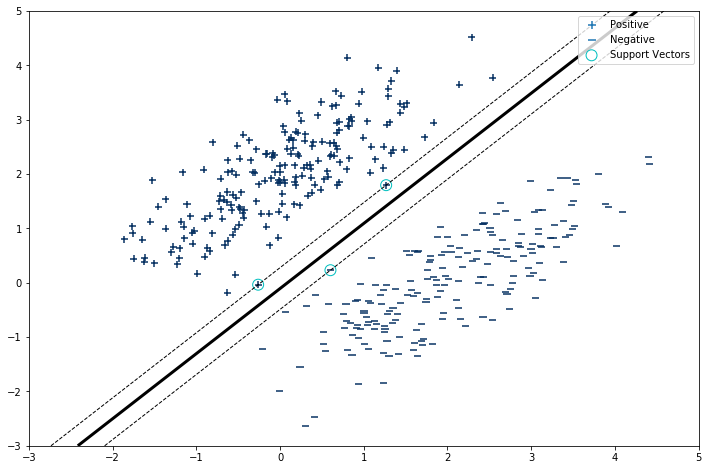

In [34]:
def main():   
    
    # Import data
    X, Y = generate_dataset_MVND_ls()
    print(X.shape, Y.shape)
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.9, shuffle=False)
    print( X_train.shape, Y_train.shape)
    print( X_test.shape, Y_test.shape)
    # Model Learning
    model = SVM(linear_kernel)
    model.fit(X_train, Y_train) 
    # Model Working
    Y_pred = model.predict(X_test) 
    Y_pred = np.sign(Y_pred)
    #Statistics
    #print( 'Accuracy count: ', metric_accuracy_count(Y_test, Y_pred), ' out of ', len(Y_test), ' are correct!' ) 
    #Visulaization
    plt.figure(figsize = (12, 8))
    c1 = np.ma.masked_where(Y == -1, Y)
    c2 = np.ma.masked_where(Y == 1, Y)
    plt.scatter(X[:,0], X[:,1], s=50, c=c1, cmap="RdBu_r", marker = '+', label = 'Positive ')
    plt.scatter(X[:,0], X[:,1], s=50, c=c2, cmap="RdBu_r", marker = '_', label = 'Negative ')
    plt.scatter(model.support_vector[:,0], model.support_vector[:,1], s=120, facecolors='none', edgecolors='c', label = 'Support Vectors')       
    X1, X2 = np.meshgrid(np.linspace(-3,5,10), np.linspace(-3,5,10))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Y = model.predict(X).reshape(X1.shape)
    plt.contour(X1, X2, Y, [0], colors='k', linewidths=3) # W^t X = 0
    plt.contour(X1, X2, Y - 1, [0], colors='k', linestyles = 'dashed', linewidths=1) # W^t X = 1
    plt.contour(X1, X2, Y + 1, [0], colors='k', linestyles = 'dashed', linewidths=1) # W^t X = -1
    
    plt.legend()
    plt.show()
        
if __name__ == "__main__":
    main()

(200, 2) (200,)
(180, 2) (180,)
(20, 2) (20,)
     pcost       dcost       gap    pres   dres
 0:  1.2857e+05 -8.2613e+07  2e+08  5e-01  7e-12
 1:  3.3762e+05 -1.3057e+07  2e+07  4e-02  9e-12
 2:  2.8724e+05 -1.7424e+06  3e+06  4e-03  6e-12
 3:  9.4295e+04 -2.9111e+05  4e+05  3e-04  4e-12
 4:  1.2608e+04 -4.0477e+04  5e+04  2e-05  3e-12
 5:  1.3255e+03 -1.8776e+04  2e+04  5e-06  3e-12
 6: -2.7185e+03 -8.2299e+03  6e+03  9e-08  4e-12
 7: -3.4601e+03 -8.8913e+03  5e+03  8e-08  6e-12
 8: -3.6715e+03 -8.6437e+03  5e+03  5e-08  5e-12
 9: -4.9999e+03 -6.7664e+03  2e+03  2e-08  5e-12
10: -4.9169e+03 -6.6712e+03  2e+03  2e-08  6e-12
11: -5.3938e+03 -5.8440e+03  5e+02  3e-09  6e-12
12: -5.4754e+03 -5.6924e+03  2e+02  1e-09  6e-12
13: -5.5303e+03 -5.5970e+03  7e+01  3e-10  6e-12
14: -5.5422e+03 -5.5814e+03  4e+01  8e-14  7e-12
15: -5.5585e+03 -5.5600e+03  2e+00  1e-13  8e-12
16: -5.5593e+03 -5.5593e+03  2e-02  2e-12  7e-12
17: -5.5593e+03 -5.5593e+03  2e-04  2e-12  7e-12
Optimal solution found.


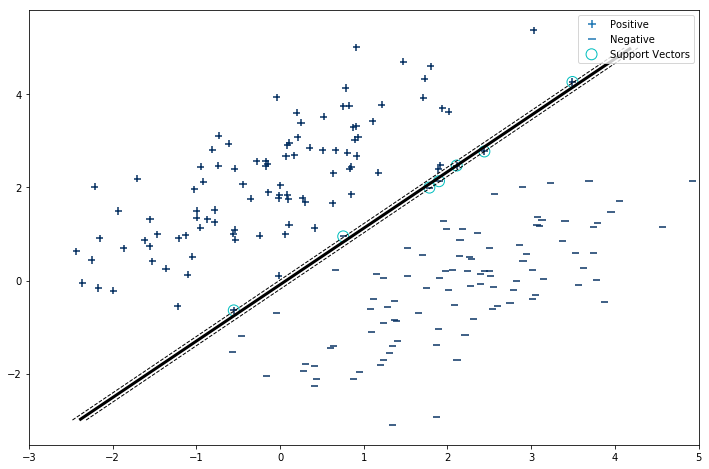

In [31]:
def main():   
    
    # Import data
    X, Y = generate_dataset_MVND_lso()
    print(X.shape, Y.shape)
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.9, shuffle=False)
    print( X_train.shape, Y_train.shape)
    print( X_test.shape, Y_test.shape)
    # Model Learning
    model = SVM(linear_kernel, C=1000)
    model.fit(X_train, Y_train) 
    # Model Working
    Y_pred = model.predict(X_test) 
    Y_pred = np.sign(Y_pred)
    #Statistics
    #print( 'Accuracy count: ', metric_accuracy_count(Y_test, Y_pred), ' out of ', len(Y_test), ' are correct!' ) 
    #Visulaization
    plt.figure(figsize = (12, 8))
    c1 = np.ma.masked_where(Y == -1, Y)
    c2 = np.ma.masked_where(Y == 1, Y)
    plt.scatter(X[:,0], X[:,1], s=50, c=c1, cmap="RdBu_r", marker = '+', label = 'Positive ')
    plt.scatter(X[:,0], X[:,1], s=50, c=c2, cmap="RdBu_r", marker = '_', label = 'Negative ')
    plt.scatter(model.support_vector[:,0], model.support_vector[:,1], s=120, facecolors='none', edgecolors='c', label = 'Support Vectors')       
    X1, X2 = np.meshgrid(np.linspace(-3,5,10), np.linspace(-3,5,10))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Y = model.predict(X).reshape(X1.shape)
    plt.contour(X1, X2, Y, [0], colors='k', linewidths=3) # W^t X = 0
    plt.contour(X1, X2, Y - 1, [0], colors='k', linestyles = 'dashed', linewidths=1) # W^t X = 1
    plt.contour(X1, X2, Y + 1, [0], colors='k', linestyles = 'dashed', linewidths=1) # W^t X = -1
    
    plt.legend()
    plt.show()
        
if __name__ == "__main__":
    main()


(400, 2) (400,)
(360, 2) (360,)
(40, 2) (40,)
     pcost       dcost       gap    pres   dres
 0: -7.9829e+01 -1.8731e+02  2e+03  6e+01  2e+00
 1: -1.8742e+02 -2.1952e+02  1e+03  3e+01  1e+00
 2: -1.1443e+02 -7.6335e+01  8e+02  2e+01  7e-01
 3: -2.0436e+01 -2.5628e+00  1e+02  2e+00  1e-01
 4: -5.1967e-01 -5.0566e-01  4e+00  7e-02  3e-03
 5: -2.1260e-01 -4.6861e-01  2e+00  3e-02  1e-03
 6: -1.4130e-01 -3.9089e-01  1e+00  1e-02  6e-04
 7: -1.6123e-01 -3.6440e-01  7e-01  7e-03  3e-04
 8: -2.2299e-01 -2.9420e-01  3e-01  2e-03  9e-05
 9: -2.0951e-01 -2.3231e-01  1e-01  1e-03  4e-05
10: -2.0760e-01 -2.3499e-01  1e-01  1e-03  4e-05
11: -1.9086e-01 -2.3962e-01  1e-01  5e-04  2e-05
12: -2.0936e-01 -2.2392e-01  3e-02  1e-04  4e-06
13: -2.1244e-01 -2.2106e-01  9e-03  1e-06  4e-08
14: -2.1957e-01 -2.2041e-01  9e-04  7e-08  3e-09
15: -2.2033e-01 -2.2037e-01  3e-05  3e-09  1e-10
16: -2.2036e-01 -2.2036e-01  4e-07  3e-11  1e-12
17: -2.2036e-01 -2.2036e-01  4e-09  3e-13  4e-14
Optimal solution found.


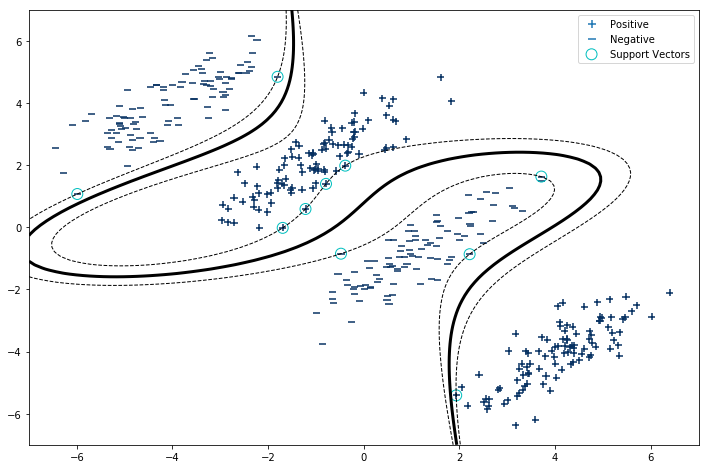

In [32]:
def main():   
    
    # Import data
    X, Y = generate_dataset_MVND_nls()
    print(X.shape, Y.shape)
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.9, shuffle=False)
    print( X_train.shape, Y_train.shape)
    print( X_test.shape, Y_test.shape)
    # Model Learning
    model = SVM(polynomial_kernel)
    model.fit(X_train, Y_train) 
    # Model Working
    Y_pred = model.predict(X_test) 
    Y_pred = np.sign(Y_pred)
    #Statistics
    #print( 'Accuracy count: ', metric_accuracy_count(Y_test, Y_pred), ' out of ', len(Y_test), ' are correct!' ) 
    #Visulaization
    plt.figure(figsize = (12, 8))
    c1 = np.ma.masked_where(Y == -1, Y)
    c2 = np.ma.masked_where(Y == 1, Y)
    plt.scatter(X[:,0], X[:,1], s=50, c=c1, cmap="RdBu_r", marker = '+', label = 'Positive ')
    plt.scatter(X[:,0], X[:,1], s=50, c=c2, cmap="RdBu_r", marker = '_', label = 'Negative ')
    plt.scatter(model.support_vector[:,0], model.support_vector[:,1], s=120, facecolors='none', edgecolors='c', label = 'Support Vectors')       
    X1, X2 = np.meshgrid(np.linspace(-7,7,100), np.linspace(-7,7,100))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Y = model.predict(X).reshape(X1.shape)
    plt.contour(X1, X2, Y, [0], colors='k', linewidths=3) # W^t X = 0
    plt.contour(X1, X2, Y - 1, [0], colors='k', linestyles = 'dashed', linewidths=1) # W^t X = 1
    plt.contour(X1, X2, Y + 1, [0], colors='k', linestyles = 'dashed', linewidths=1) # W^t X = -1
    
    plt.legend()
    plt.show()
        
if __name__ == "__main__":
    main()

(200, 2) (200,)
(180, 2) (180,)
(20, 2) (20,)
     pcost       dcost       gap    pres   dres
 0: -4.7204e+01 -1.3121e+02  5e+02  2e+01  2e+00
 1: -1.0062e+02 -1.8876e+02  2e+02  7e+00  9e-01
 2: -1.4345e+02 -2.3750e+02  2e+02  6e+00  7e-01
 3: -2.4811e+02 -3.0561e+02  1e+02  3e+00  3e-01
 4: -2.5812e+02 -3.3929e+02  1e+02  1e+00  1e-01
 5: -3.0080e+02 -3.1677e+02  2e+01  2e-01  2e-02
 6: -3.0667e+02 -3.1146e+02  5e+00  2e-02  2e-03
 7: -3.1043e+02 -3.1052e+02  1e-01  3e-04  4e-05
 8: -3.1050e+02 -3.1050e+02  1e-03  3e-06  4e-07
 9: -3.1050e+02 -3.1050e+02  1e-05  3e-08  4e-09
Optimal solution found.


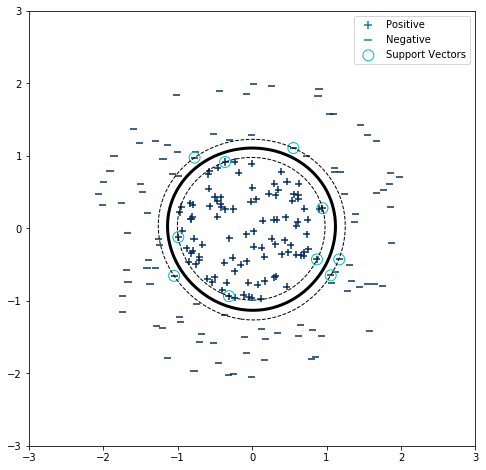

In [105]:
def main():   
    
    # Import data
    X, Y = generate_dataset_MVND_nls2()
    print(X.shape, Y.shape)
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.9, shuffle=False)
    print( X_train.shape, Y_train.shape)
    print( X_test.shape, Y_test.shape)
    # Model Learning
    model = SVM(gaussian_kernel)
    model.fit(X_train, Y_train) 
    # Model Working
    Y_pred = model.predict(X_test) 
    Y_pred = np.sign(Y_pred)
    #Statistics
    #print( 'Accuracy count: ', metric_accuracy_count(Y_test, Y_pred), ' out of ', len(Y_test), ' are correct!' ) 
    #Visulaization
    plt.figure(figsize = (8, 8))
    c1 = np.ma.masked_where(Y == -1, Y)
    c2 = np.ma.masked_where(Y == 1, Y)
    plt.scatter(X[:,0], X[:,1], s=50, c=c1, cmap="RdBu_r", marker = '+', label = 'Positive ')
    plt.scatter(X[:,0], X[:,1], s=50, c=c2, cmap="RdBu_r", marker = '_', label = 'Negative ')
    plt.scatter(model.support_vector[:,0], model.support_vector[:,1], s=120, facecolors='none', edgecolors='c', label = 'Support Vectors')       
    X1, X2 = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Y = model.predict(X).reshape(X1.shape)
    plt.contour(X1, X2, Y, [0], colors='k', linewidths=3) # W^t X = 0
    plt.contour(X1, X2, Y - 1, [0], colors='k', linestyles = 'dashed', linewidths=1) # W^t X = 1
    plt.contour(X1, X2, Y + 1, [0], colors='k', linestyles = 'dashed', linewidths=1) # W^t X = -1
    
    plt.legend()
    plt.show()
        
if __name__ == "__main__":
    main()